# What is a confusion matrix?

A **Confusion matrix** is an ***N x N matrix*** used for evaluating the **performance of a classification model**, where N is the number of *target classes*. The matrix compares the actual target values with those predicted by the machine learning model.

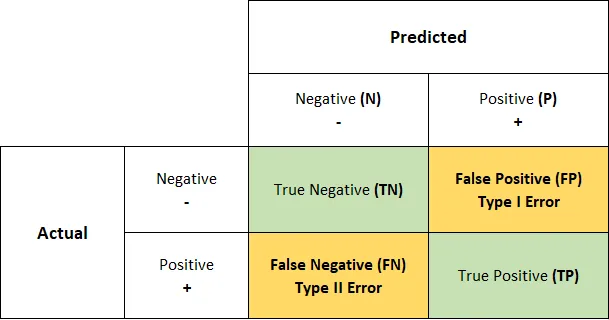

  1. A **good model** is one which has **high TP and TN rates**, while **low FP and FN rates**.

  2. If you have an *imbalanced dataset* to work with, it’s always better to use **confusion matrix** as your evaluation criteria for your machine learning model.

A **confusion matrix** is a tabular summary of the number of **correct and incorrect predictions** made by a classifier. It is used to measure the performance of a classification model. It can be used to evaluate the performance of a classification model through the calculation of performance metrics like accuracy, precision, recall, and F1-score.

----------------------------------
## Understanding Confusion Matrix:
----------------------------------

The following 4 are the basic terminology which will help us in determining the metrics we are looking for.

  - **True Positives (TP)**: when the actual value is Positive and predicted is also Positive.
  - **True negatives (TN)**: when the actual value is Negative and prediction is also Negative.
  - **False positives (FP)**: When the actual is negative but prediction is Positive. Also known as the Type 1 error
  - **False negatives (FN)**: When the actual is Positive but the prediction is Negative. Also known as the Type 2 error

---------------------------------
## Classification Measure:
---------------------------------

  - **Accuracy**: simply measures how often the classifier makes the **correct prediction**. $$\text{Accuracy} = \frac{TP+TN}{TP+TN+FP+FN}$$
  - **Precision**: It is a measure of **correctness** that is achieved in **true prediction**. $$\text{Precision} = \frac{TP}{TP+FP}$$
  - **Recall**:  It is a measure of **actual observations** which are predicted **correctly**. $$\text{Recall} = \frac{TP}{TP+FN}$$
  - **F1-score**: The **F1 score** is a number between **0 and 1** and is the **harmonic mean of precision and recall**. $$\text{F1-Score} = 2*\frac{\text{Recall}*\text{Precision}}{\text{Recall}+\text{Precision}}$$
  - **Specificity**: Is the metric that evaluates a model’s ability to **predict true negatives of each available category**. $$\text{Specificity} = \frac{FN}{TN+FP}$$

In [1]:
# Liberies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Loading the dataset

data = load_breast_cancer()

In [4]:
# Making the dataframe

df = pd.DataFrame(data.data, columns = data.feature_names)

df['Target'] = data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


['malignant', 'benign']


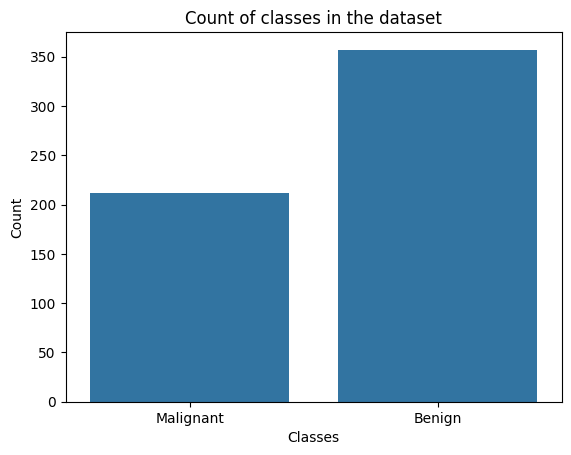

In [16]:
# Visualizing the targets

print(list(data.target_names))

sns.countplot(x = 'Target', data=df)

plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks([0,1], ['Malignant', 'Benign'])
plt.title('Count of classes in the dataset')
plt.show();

In [23]:
# Separating the target

x = df.drop('Target',axis=1)

y = df.Target

# Split the dataset into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=43)

# Train the classification model

model = DecisionTreeClassifier(random_state=43)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=43)

In [25]:
# Perform prediction on the test set

y_pred = model.predict(x_test)

# Calculate the confusion matrix

confusion_matrix = confusion_matrix(y_test, y_pred,)

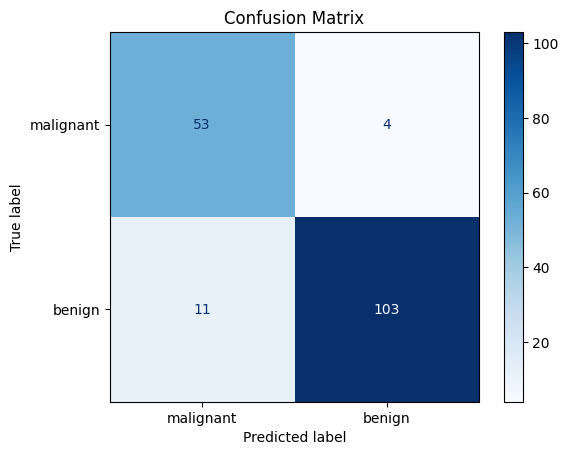

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
title = 'Confusion Matrix'
disp = ConfusionMatrixDisplay.from_estimator(
        model,
        x_test,
        y_test,
        display_labels=list(data.target_names),   #model.classes_,
        cmap=plt.cm.Blues,
        normalize=None,
    )
disp.ax_.set_title(title);

In [31]:
# Results

TP = 53
TN = 103
FP = 11
FN = 4

# Metrics

def metrics(TP,TN,FP,FN):
  accuracy = (TP+TN)/(TP+TN+FP+FN)
  recall = TP/(TP+FN)
  specifity = FN/(TN+FP)
  precision = TP/(TP+FP)
  fscore = 2*(precision*recall)/(precision+recall)

  return accuracy, recall, specifity, precision, fscore

metrics_results = metrics(TP, TN, FP, FN)

print('Accuracy:', metrics_results[0])
print('Recall:', metrics_results[1])
print('Scpecifity:', metrics_results[2])
print('Precision:', metrics_results[3])
print('F1-Score:', metrics_results[4])

Accuracy: 0.9122807017543859
Recall: 0.9298245614035088
Scpecifity: 0.03508771929824561
Precision: 0.828125
F1-Score: 0.8760330578512396
